## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [3]:
your_name = "Thanh Nguyen Ho"
your_student_id = "48351059"

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [6]:
column_names = ['name', 'year', 'selling_price', 'km_driven' , 'fuel' , 'seller_type' , 'transmission' , 'Owner' ]
df = pd.read_csv('car_sells_clean_data.csv', header=None, names=column_names, skipinitialspace=True)

### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [8]:
df1= df.iloc[1:]
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,Owner
1,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
2,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
3,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
4,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
5,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

numerical = df1[[ 'year', 'km_driven', 'selling_price']]
categorical =  df1[['seller_type' , 'transmission' , 'Owner', 'fuel' ]]


In [10]:
numerical

,year,km_driven,selling_price
1,2007.0,70000,60000
2,2007.0,50000,135000
3,2012.0,100000,600000
4,2017.0,46000,250000
5,2014.0,141000,450000
...,...,...,...
3653,2014.0,80000,409999
3654,2014.0,80000,409999
3655,2009.0,83000,110000
3656,2016.0,90000,865000


In [11]:
categorical

,seller_type,transmission,Owner,fuel
1,Individual,Manual,First Owner,Petrol
2,Individual,Manual,First Owner,Petrol
3,Individual,Manual,First Owner,Diesel
4,Individual,Manual,First Owner,Petrol
5,Individual,Manual,Second Owner,Diesel
...,...,...,...,...
3653,Individual,Manual,Second Owner,Diesel
3654,Individual,Manual,Second Owner,Diesel
3655,Individual,Manual,Second Owner,Petrol
3656,Individual,Manual,First Owner,Diesel


                   year  km_driven  selling_price
year           1.000000  -0.404058       0.411103
km_driven     -0.404058   1.000000      -0.177203
selling_price  0.411103  -0.177203       1.000000


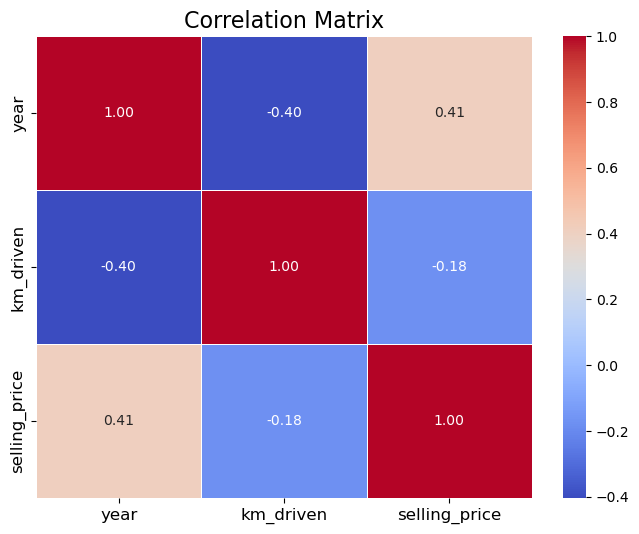

In [12]:
correlation_matrix = numerical.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar=True)


plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [15]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df1.drop(columns=['selling_price'])
y = df1['selling_price']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Case 1: Training on 10% of the data
X_train_10, X_test_90, y_train_10, y_test_90 = train_test_split(X, y, test_size=0.9, random_state=42)

# Case 2: Training on 90% of the data
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shape of the training and testing sets for both cases
(X_train_10.shape, X_test_90.shape, X_train_90.shape, X_test_10.shape)


((365, 2024), (3292, 2024), (3291, 2024), (366, 2024))

### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [60]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
correlation_matrix = numerical.corr()
corr_with_target =correlation_matrix['selling_price'].abs().sort_values(ascending=False)

most_correlated_features = corr_with_target.index[1:3].tolist()
least_correlated_features = corr_with_target.index[-2:].tolist()
#module a
X_train_a = X_train1[most_correlated_features]
X_test_a = X_test1[most_correlated_features]
model_a = LinearRegression()
model_a.fit(X_train_a, y_train1)
y_pred_a = model_a.predict(X_test_a)
mse_a = mean_squared_error(y_test1, y_pred_a)
#module b
X_train_b = X_train1[least_correlated_features]
X_test_b = X_test1[least_correlated_features]
model_b = LinearRegression()
model_b.fit(X_train_b, y_train1)
y_pred_b = model_b.predict(X_test_b)
mse_b = mean_squared_error(y_test1, y_pred_b)
#modulec
X_train_c = X_train2[most_correlated_features]
X_test_c = X_test2[most_correlated_features]
model_c = LinearRegression()
model_c.fit(X_train_c, y_train2)
y_pred_c = model_c.predict(X_test_c)
mse_c = mean_squared_error(y_test2, y_pred_c)
#moduled
X_train_d = X_train2[least_correlated_features]
X_test_d = X_test2[least_correlated_features]
model_d = LinearRegression()
model_d.fit(X_train_d, y_train2)
y_pred_d = model_d.predict(X_test_d)
mse_d = mean_squared_error(y_test2, y_pred_d)

print("Model-a MSE:", mse_a)
print("Model-b MSE:", mse_b)
print("Model-c MSE:", mse_c)
print("Model-d MSE:", mse_d)

Model-a MSE: 204257472798.50436
Model-b MSE: 204257472798.50436
Model-c MSE: 219142056598.72705
Model-d MSE: 219142056598.72705


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [62]:
import math

# Calculate MSE and RMSE for each model
mse_a = mean_squared_error(y_test1, y_pred_a)
rmse_a = math.sqrt(mse_a)
mse_b = mean_squared_error(y_test1, y_pred_b)
rmse_b = math.sqrt(mse_b)
mse_c = mean_squared_error(y_test2, y_pred_c)
rmse_c = math.sqrt(mse_c)
mse_d = mean_squared_error(y_test2, y_pred_d)
rmse_d = math.sqrt(mse_d)

# Print the results
print("Model-a:")
print("MSE:", mse_a)
print("RMSE:", rmse_a)
print()
print("Model-b:")
print("MSE:", mse_b)
print("RMSE:", rmse_b)
print()
print("Model-c:")
print("MSE:", mse_c)
print("RMSE:", rmse_c)
print()
print("Model-d:")
print("MSE:", mse_d)
print("RMSE:", rmse_d)

Model-a:
MSE: 204257472798.50436
RMSE: 451948.5289261426

Model-b:
MSE: 204257472798.50436
RMSE: 451948.5289261426

Model-c:
MSE: 219142056598.72705
RMSE: 468126.1118531277

Model-d:
MSE: 219142056598.72705
RMSE: 468126.1118531277


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

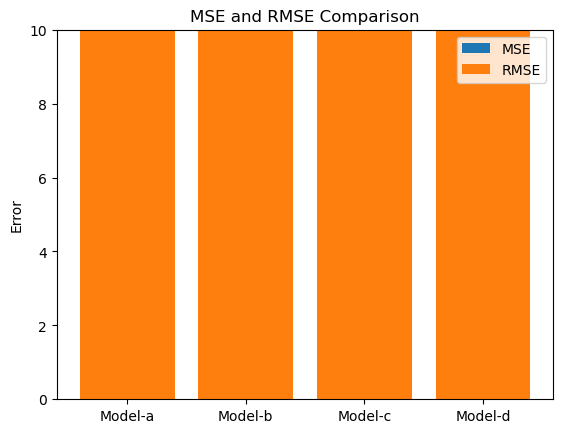

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_labels = ['Model-a', 'Model-b', 'Model-c', 'Model-d']
ax.set_ylabel('Error')
ax.set_title('MSE and RMSE Comparison')
ax.bar(x_labels, [mse_a, mse_b, mse_c, mse_d], label='MSE')
ax.bar(x_labels, [rmse_a, rmse_b, rmse_c, rmse_d], label='RMSE')
ax.set_ylim([0, 10])  # adjust the scale as needed
ax.legend()

plt.show()

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


A number of ethical concerns related to data representation and interpretation arise from the following infographics on the medals in the 2008 Summer Olympics.
Comparisons by the country according to total medals versus gold medals may thus be misleading. Whereas Table 1 emphasizes total medals, implying an overall athletic competence, Table 2 refers to gold medals and suggests a different storyline of sporting excellence. Such selective representation can easily mislead the perception of the citizens and bias national performance and superiority conversatio. 

Moreover, visual features, such as color or design motifs, can introduce bias in their own right, like favoring one country over another. Poor or over-elaborate design features can be misinterpreted if not appropriately addressed; these could potentially harm the validity of the information conve .

Besides, it's also a question of context in which such information is sared. Unless geopolitical considerations or investment in sports is clearly explained behind these statistics, viewers will tend to form opinions based on this numeric representation rather than a nuanced understanding of sporting achiev.  ts.

Ethical data visualization ensures the information depicted is accurate, clear, and contextually appropriate, affording all who view the display the ability to understand the information presented with no distortion or bias. Being cognizant of these concerns should be fundamental in preserving the integrity of data communication in sports analytics.